In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [38]:
import seaborn as sns

In [8]:
br = pd.read_csv("ex6-2/birth-rate.csv")
br.head(6)

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,36.400000,35.179,33.863,32.459,30.994,29.513000,28.069,26.721,25.518,...,15.024000,14.528000,14.041000,13.579000,13.153000,12.772000,12.441000,12.159000,11.919000,11.716000
1,Afghanistan,52.201000,52.206,52.208,52.204,52.192,52.168000,52.130,52.076,52.006,...,51.229000,50.903000,50.486000,49.984000,49.416000,48.803000,48.177000,47.575000,47.023000,46.538000
2,Angola,54.432000,54.394,54.317,54.199,54.040,53.836000,53.585,53.296,52.984,...,48.662000,48.355000,48.005000,47.545000,46.936000,46.184000,45.330000,44.444000,43.607000,42.875000
3,Albania,40.886000,40.312,39.604,38.792,37.913,37.008000,36.112,35.245,34.421,...,17.713000,16.850000,16.081000,15.444000,14.962000,14.644000,14.485000,14.464000,14.534000,14.649000
4,Netherlands Antilles,32.321000,30.987,29.618,28.229,26.849,25.518000,24.280,23.173,22.230,...,15.809000,15.412000,15.096000,14.824000,14.565000,14.309000,14.051000,13.790000,13.532000,13.281000
5,Arab World,47.611217,NaN,NaN,NaN,NaN,46.572876,NaN,NaN,NaN,...,29.073137,28.682796,28.305238,27.962437,27.670074,27.378971,27.118861,26.855318,26.593517,26.324048


In [51]:
br[['Country','2008']].iloc[0:5]

,Country,2008
0,Aruba,11.716
1,Afghanistan,46.538
2,Angola,42.875
3,Albania,14.649
4,Netherlands Antilles,13.281


In [3]:
ed = pd.read_csv("ex6-2/education.csv")
ed.head(6)

,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
0,United States,501,515,493,46,7.9,4.4
1,Alabama,557,552,549,7,6.7,2.3
2,Alaska,520,516,492,46,7.9,7.3
3,Arizona,516,521,497,26,10.4,7.6
4,Arkansas,572,572,556,5,6.8,4.6
5,California,500,513,498,49,10.9,5.5


In [6]:
cr = pd.read_csv("ex6-2/crimeratesbystate-formatted.csv")
cr.head(6)

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1
5,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8


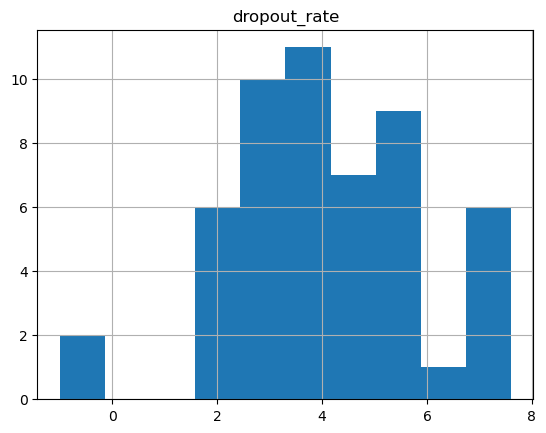

In [4]:
ed.hist(column='dropout_rate');

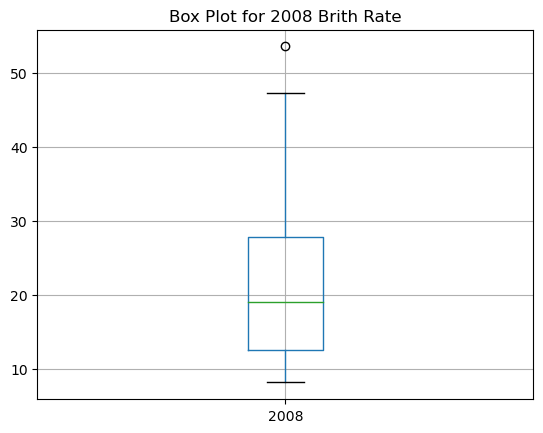

In [10]:
b_plot = br.boxplot(column = '2008')
b_plot.plot()
plot.title('Box Plot for 2008 Brith Rate')
plot.show() 

In [13]:
#pip install altair

In [14]:
import altair as alt

In [17]:
import plotly.figure_factory as ff

In [21]:
fig = ff.create_bullet(
    ed, titles='state',
    #subtitles='sublabel', 
    markers='math',
    measures='reading',
    ranges='writing', 
    orientation='h',
    title='my simple bullet chart'
)
  
fig.show()

TypeError: object of type 'int' has no len()

In [35]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

trace1 = go.Indicator(mode="gauge+number",    value=cr.iloc[1]['burglary'],    domain={'row' : 1, 'column' : 1}, title={'text': "Alabama Burglary"})
trace2 = go.Indicator(mode="gauge+number",    value=cr.iloc[2]['burglary'],    domain={'row' : 1, 'column' : 2}, title={'text': "Alaska Burglary"})

fig = make_subplots(
    rows=1,
    cols=2,
    specs=[[{'type' : 'indicator'}, {'type' : 'indicator'}]],
    )

fig.append_trace(trace1, row=1, col=1)
fig.append_trace(trace2, row=1, col=2)

fig.show()

In [40]:
def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("green", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plot.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plot.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)

C:\Users\atanu\AppData\Local\Temp\ipykernel_22192\3571893196.py:43: UserWarning:

FixedFormatter should only be used together with FixedLocator



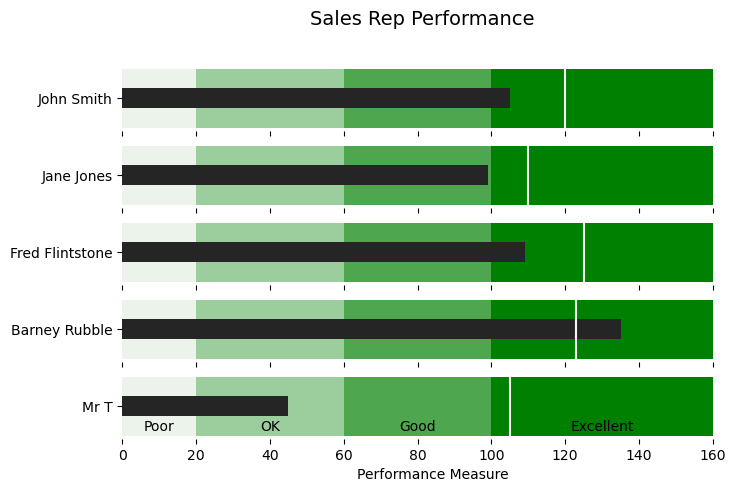

In [53]:
data_to_plot2 = [("John Smith", 105, 120),
                 ("Jane Jones", 99, 110),
                 ("Fred Flintstone", 109, 125),
                 ("Barney Rubble", 135, 123),
                 ("Mr T", 45, 105)]

bulletgraph(data_to_plot2, limits=[20, 60, 100, 160],
            labels=["Poor", "OK", "Good", "Excellent"], size=(8,5),
            axis_label="Performance Measure", label_color="black",
            bar_color="#252525", target_color='#f7f7f7',
            title="Sales Rep Performance")

In [61]:
br_ = br[['Country','2007','2008']].iloc[0:4]
values = br_.values.tolist()
v = [tuple(i) for i in values]
print(v)


[('Aruba', 11.919, 11.716), ('Afghanistan', 47.023, 46.538), ('Angola', 43.607, 42.875), ('Albania', 14.534, 14.649)]


C:\Users\atanu\AppData\Local\Temp\ipykernel_22192\3571893196.py:43: UserWarning:

FixedFormatter should only be used together with FixedLocator



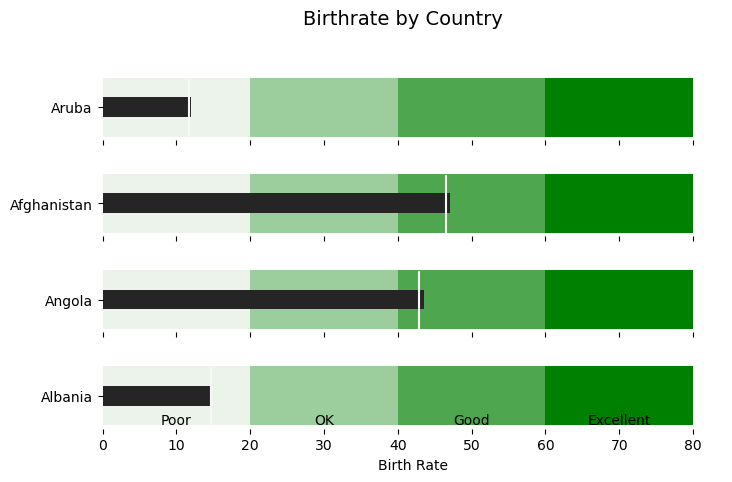

In [65]:

bulletgraph(v, limits=[20, 40, 60, 80],
            labels=["Poor", "OK", "Good", "Excellent"], size=(8,5),
            axis_label="Birth Rate", label_color="black",
            bar_color="#252525", target_color='#f7f7f7',
            title="Birthrate by Country")